#Part - 1: Data Preprocessing

###**Importing the Dataset**

In [39]:
import numpy as np
import tensorflow as tf
import pandas as pd

In [40]:
tf.__version__

'2.18.0'

In [41]:
data = pd.read_csv('/content/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


**Calling Out Features.**

In [42]:
features = data.columns
for i in features:
    print(i," : ",data[i].dtype)

price  :  int64
area  :  int64
bedrooms  :  int64
bathrooms  :  int64
stories  :  int64
mainroad  :  object
guestroom  :  object
basement  :  object
hotwaterheating  :  object
airconditioning  :  object
parking  :  int64
prefarea  :  object
furnishingstatus  :  object


In [44]:
unqiue_values = {}
for column in data.columns:
    unique_values = data[column].unique()
    unqiue_values[column] = unique_values
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'price': [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000

In [45]:
X = data.drop('price',axis=1).values
y = data['price'].values

In [46]:
print(X)
X.shape

[[7420 4 2 ... 2 'yes' 'furnished']
 [8960 4 4 ... 3 'no' 'furnished']
 [9960 3 2 ... 2 'yes' 'semi-furnished']
 ...
 [3620 2 1 ... 0 'no' 'unfurnished']
 [2910 3 1 ... 0 'no' 'furnished']
 [3850 3 1 ... 0 'no' 'unfurnished']]


(545, 12)

In [47]:
print(y)
y.shape

[13300000 12250000 12250000 12215000 11410000 10850000 10150000 10150000
  9870000  9800000  9800000  9681000  9310000  9240000  9240000  9100000
  9100000  8960000  8890000  8855000  8750000  8680000  8645000  8645000
  8575000  8540000  8463000  8400000  8400000  8400000  8400000  8400000
  8295000  8190000  8120000  8080940  8043000  7980000  7962500  7910000
  7875000  7840000  7700000  7700000  7560000  7560000  7525000  7490000
  7455000  7420000  7420000  7420000  7350000  7350000  7350000  7350000
  7343000  7245000  7210000  7210000  7140000  7070000  7070000  7035000
  7000000  6930000  6930000  6895000  6860000  6790000  6790000  6755000
  6720000  6685000  6650000  6650000  6650000  6650000  6650000  6650000
  6629000  6615000  6615000  6580000  6510000  6510000  6510000  6475000
  6475000  6440000  6440000  6419000  6405000  6300000  6300000  6300000
  6300000  6300000  6293000  6265000  6230000  6230000  6195000  6195000
  6195000  6160000  6160000  6125000  6107500  6090

(545,)

###**Encoding Categorical Dataset**

**Label Encoding for 'Gender'**

In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(X.shape[1]):
    if X[:,i].dtype == 'object':
        X[:,i] = le.fit_transform(X[:,i])
#SYNTAX: le.fit_transform(Data[:, column_index])

In [49]:
print(X)

[[232 3 1 ... 2 1 0]
 [260 3 3 ... 3 0 0]
 [268 2 1 ... 2 1 1]
 ...
 [72 1 0 ... 0 0 2]
 [35 2 0 ... 0 0 0]
 [90 2 0 ... 0 0 2]]


In [50]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,232,3,1,2,1,0,0,0,1,2,1,0
1,260,3,3,3,1,0,0,0,1,3,0,0
2,268,2,1,1,1,0,1,0,0,2,1,1
3,237,3,1,1,1,0,1,0,1,3,1,0
4,232,3,0,1,1,1,1,0,1,2,0,0


In [51]:
for column in X.columns:
    print(X[column].unique())

[232 260 268 237 256 283 249 172 281 183 205 64 243 206 254 130 198 118
 224 247 129 257 204 258 244 166 235 220 143 181 216 236 261 196 201 117
 234 194 157 276 239 259 190 274 241 278 100 153 102 115 202 170 272 84
 251 210 95 231 151 213 139 226 109 197 195 126 164 52 207 252 264 214 246
 218 80 221 227 191 229 203 282 225 277 174 159 163 132 173 209 134 156
 124 55 77 188 29 245 47 189 215 211 200 270 253 160 87 266 255 186 222 49
 59 39 275 171 68 238 273 250 125 240 28 180 113 128 108 110 136 192 37
 212 133 279 60 150 120 112 185 217 140 262 193 269 199 158 73 265 82 91
 169 33 152 127 89 75 20 161 162 67 148 65 61 267 178 48 83 96 144 34 145
 146 92 3 105 101 271 58 10 122 242 208 27 154 176 21 36 26 13 106 8 142
 107 103 131 182 187 71 79 167 179 149 119 62 104 228 54 88 248 85 223 90
 6 11 56 141 175 32 19 219 63 184 70 46 168 116 69 111 31 12 114 7 40 99
 233 230 66 263 177 280 42 50 4 138 147 135 81 45 25 137 18 86 93 123 24
 98 0 43 165 14 9 44 30 155 121 78 41 22 23 94 5 

**Splitting the data into Training and Testing Data**

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**Feature Scaing.**

In [53]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


In [54]:
print(X_train)

[[-0.85800599 -1.29437561 -0.57330726 ... -0.81914879 -0.57028761
   1.18364739]
 [-0.4821974  -1.29437561 -0.57330726 ... -0.81914879 -0.57028761
   1.18364739]
 [-1.27407979 -1.29437561 -0.57330726 ... -0.81914879 -0.57028761
   1.18364739]
 ...
 [ 0.48416756  0.05251643  1.4755613  ...  0.32555914  1.75350117
   1.18364739]
 [-0.87142773  0.05251643 -0.57330726 ...  0.32555914 -0.57028761
   1.18364739]
 [ 0.94050657  0.05251643 -0.57330726 ... -0.81914879  1.75350117
  -1.44936416]]


In [55]:
print(X_test)

[[-0.4821974   0.05251643 -0.57330726 ...  0.32555914 -0.57028761
  -1.44936416]
 [ 1.71896722  0.05251643 -0.57330726 ...  1.47026706  1.75350117
  -1.44936416]
 [-0.99222334  1.39940847 -0.57330726 ... -0.81914879 -0.57028761
  -0.13285838]
 ...
 [ 0.68549359 -1.29437561 -0.57330726 ...  0.32555914 -0.57028761
  -0.13285838]
 [-0.13323227 -1.29437561 -0.57330726 ...  0.32555914 -0.57028761
  -0.13285838]
 [ 0.69891533  0.05251643  1.4755613  ...  1.47026706  1.75350117
  -1.44936416]]


#Part - 2: Building the ANN

###**Initialise the ANN.**

In [56]:
ann = tf.keras.models.Sequential()

###**Adding the input and hidden layer.**

In [57]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # Input + 1st hidden layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))  # 2nd hidden layer

###**Adding the Output Layer.**

In [59]:
ann.add(tf.keras.layers.Dense(units = 1))

#Part - 3: Training the ANN

###**Compiling the ANN.**

In [60]:
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
'''
 * For binary classification, loss = 'binary_crossentropy'
 * For non-binary classification, loss = 'categorical_crossentropy'
'''

"\n * For binary classification, loss = 'binary_crossentropy'\n * For non-binary classification, loss = 'categorical_crossentropy'\n"

###**Training the ANN on the Training set.**

In [61]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24748285231104.0000 - mae: 4650611.0000
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 26793683714048.0000 - mae: 4826539.5000
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27119994273792.0000 - mae: 4839921.5000  
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27369532293120.0000 - mae: 4861905.5000 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26364920987648.0000 - mae: 4776383.0000 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25970465570816.0000 - mae: 4730907.0000 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27608475500544.0000 - mae: 4896237.5000 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26453227864064.0000 - mae: 4785127.5000 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 25878916497408.0000 - mae: 4695313.5000
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25563613888512.0000 - mae: 4689131.0000 

**Fill details for price prediction:**

In [62]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

while True:
    print("\n--- Start entering house details ---")

    # Collect numeric inputs
    area = int(input("Enter the area of the house (in sqft): "))
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = int(input("Enter the number of bathrooms: "))
    stories = int(input("Enter the number of stories: "))
    parking = int(input("Enter the number of parking spaces: "))

    # Collect categorical inputs
    mainroad = input("Is your house connected to the main road? (yes/no): ").lower()
    guestroom = input("Does your house have a guest room? (yes/no): ").lower()
    basement = input("Does your house have a basement? (yes/no): ").lower()
    hotwaterheating = input("Does your house have hot water heating? (yes/no): ").lower()
    airconditioning = input("Does your house have air conditioning? (yes/no): ").lower()
    prefarea = input("Is your house in a preferred area? (yes/no): ").lower()
    furnishingstatus = input("Furnishing status? (furnished / semi-furnished / unfurnished): ").lower()

    # --- Preprocessing ---
    # Scale numericals
    numerical_data = [[area, bedrooms, bathrooms, stories, parking]]
    scaler = StandardScaler()
    scaled_numericals = scaler.fit_transform(numerical_data)

    # Encode categoricals
    le = LabelEncoder()
    le_mainroad = le.fit_transform([mainroad])[0]
    le_guestroom = le.fit_transform([guestroom])[0]
    le_basement = le.fit_transform([basement])[0]
    le_hotwaterheating = le.fit_transform([hotwaterheating])[0]
    le_airconditioning = le.fit_transform([airconditioning])[0]
    le_prefarea = le.fit_transform([prefarea])[0]
    le_furnishingstatus = le.fit_transform([furnishingstatus])[0]

    # Combine features
    final_features = list(scaled_numericals[0]) + [
        le_mainroad,
        le_guestroom,
        le_basement,
        le_hotwaterheating,
        le_airconditioning,
        le_prefarea,
        le_furnishingstatus
    ]

    print("\n✅ Final Scaled and Encoded Feature Vector:")
    print(final_features)

    again = input("\nDo you want to enter another house? (yes/no): ").lower()
    if again != 'yes':
        break


--- Start entering house details ---
Enter the area of the house (in sqft): 8000
Enter the number of bedrooms: 3
Enter the number of bathrooms: 4
Enter the number of stories: 4
Enter the number of parking spaces: 3
Is your house connected to the main road? (yes/no): yes
Does your house have a guest room? (yes/no): yes
Does your house have a basement? (yes/no): yes
Does your house have hot water heating? (yes/no): yes
Does your house have air conditioning? (yes/no): yes
Is your house in a preferred area? (yes/no): yes
Furnishing status? (furnished / semi-furnished / unfurnished): furnished

✅ Final Scaled and Encoded Feature Vector:
[np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]

Do you want to enter another house? (yes/no): no


**Label Encode the house details**

#**Part - 4 : Predicting and Evaluating the model**

###**Predicting the result.**

In [63]:
# Ensure the correct order for the prediction input:
input_data = [[
    scaled_numericals[0][0],  # area (scaled)
    scaled_numericals[0][1],  # bedrooms (scaled)
    scaled_numericals[0][2],  # bathrooms (scaled)
    scaled_numericals[0][3],  # stories (scaled)
    le_mainroad,           # mainroad (encoded) # Removed [0] since le_mainroad is already an integer
    le_guestroom,          # guestroom (encoded) # Removed [0] since le_guestroom is already an integer
    le_basement,           # basement (encoded) # Removed [0] since le_basement is already an integer
    le_hotwaterheating,    # hotwaterheating (encoded) # Removed [0] since le_hotwaterheating is already an integer
    le_airconditioning,    # airconditioning (encoded) # Removed [0] since le_airconditioning is already an integer
    scaled_numericals[0][4],  # parking (scaled)
    le_prefarea,           # prefarea (encoded) # Removed [0] since le_prefarea is already an integer
    le_furnishingstatus    # furnishingstatus (encoded) # Removed [0] since le_furnishingstatus is already an integer
]]

# Make the prediction
prediction = ann.predict(std.transform(input_data))

# Output the prediction
print("Prediction:", prediction*100)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Prediction: [[1334791.1]]


## 🔍 Model Comparison: Linear, Ridge, Lasso, KNN, SVM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


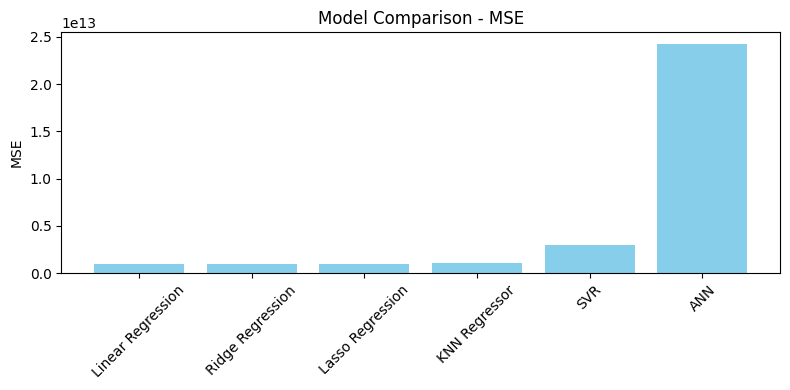

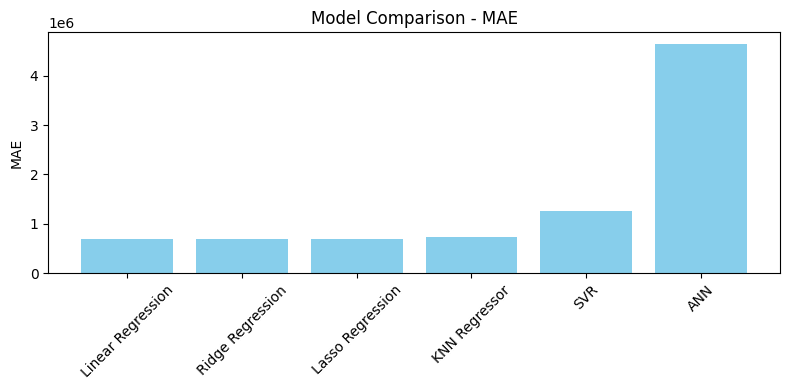

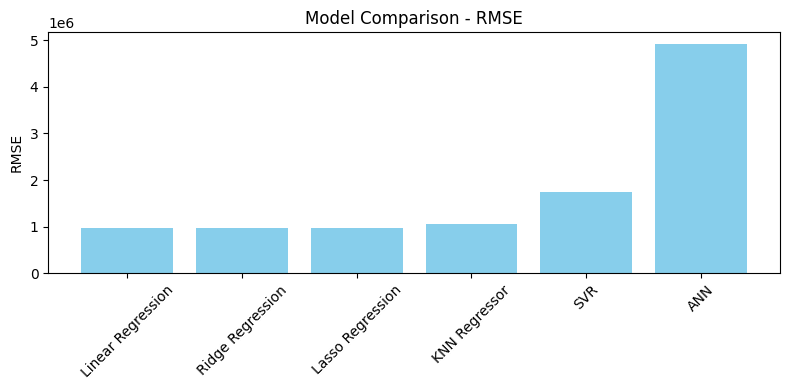

                            MSE           MAE          RMSE
Linear Regression  9.264922e+11  6.935954e+05  9.625446e+05
Ridge Regression   9.258880e+11  6.932076e+05  9.622308e+05
Lasso Regression   9.264912e+11  6.935949e+05  9.625441e+05
KNN Regressor      1.093279e+12  7.298388e+05  1.045600e+06
SVR                3.000211e+12  1.259216e+06  1.732112e+06
ANN                2.426341e+13  4.645928e+06  4.925790e+06


In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Ensure numeric type
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Traditional models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN Regressor': KNeighborsRegressor(),
    'SVR': SVR()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    results[name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

# ANN model
ann = Sequential()
ann.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1))
ann.compile(optimizer='adam', loss='mse')
ann.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

y_pred_ann = ann.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred_ann)
mae = mean_absolute_error(y_test, y_pred_ann)
rmse = np.sqrt(mse)
results['ANN'] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse}

# Plotting metrics
metrics = ['MSE', 'MAE', 'RMSE']
for metric in metrics:
    plt.figure(figsize=(8, 4))
    plt.bar(results.keys(), [results[m][metric] for m in results], color='skyblue')
    plt.title(f'Model Comparison - {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Print comparison results
df_results = pd.DataFrame(results).T
print(df_results)
